In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize

In [3]:
df = pd.read_csv("HeartFailure.csv")
df.head()

,ID,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 14)

In [5]:
df_cluster = df.iloc[:,1:13]
df_cluster.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [6]:
# Kmeans Clustering
def kmeans(df, n):
    """Function to perform kmeans
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): number of clusters
    """
    kmeans = KMeans(n_clusters=n)
    df['cluster'] = kmeans.fit_predict(df)

    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})
    
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]

 
    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot       

In [11]:
# PCA + Kmeans Clustering
def pca_kmeans(df, n):
    """Function to perform kmeans
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): number of clusters
    """
    
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]
    
    kmeans = KMeans(n_clusters=n)
    df['cluster'] = kmeans.fit_predict(df[['PC1', 'PC2']])

    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})

 
    plot = sns.scatterplot(data=df[['PC1', 'PC2']],x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot      

In [8]:
def cluster_grouping(df):
    cluster_list = []
    n = df.cluster.unique()
    
    for i in n:
        cluster_list.append(df[df['cluster'] == i])
    return cluster_list
        

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster,cen_x,cen_y,PC1,PC2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0,61.088321,0.423077,1641.969404,-0.145907
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0,61.088321,0.423077,1.766516,7279.254972
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0,61.088321,0.423077,-101358.133290,-411.138653
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0,61.088321,0.423077,-53358.143087,-457.772091
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,59.917954,0.461538,63641.865209,-437.190778


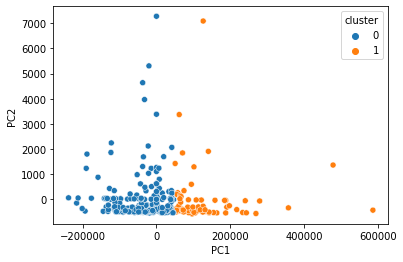

In [9]:
df_cluster_1 , plot1 = kmeans(df_cluster, 2)
df_cluster_1.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster,cen_x,cen_y,PC1,PC2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0,-81414.256307,15023.748661,-20984.209149,43334.817865
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0,-81414.256307,15023.748661,-23527.173825,42139.573878
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0,-81414.256307,15023.748661,-180687.567158,-31484.919335
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0,-81414.256307,15023.748661,-106262.797121,3382.613114
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,293091.322704,-54085.495179,183386.138102,-105481.403324


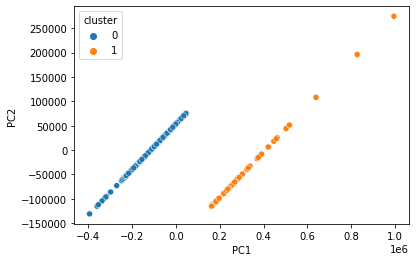

In [12]:
df_cluster_2 , plot2 = pca_kmeans(df_cluster, 2)
df_cluster_2.head()

In [1]:
# Visualize cluster 1
df[df_cluster['cluster'] == 0]

NameError: name 'df' is not defined

In [ ]:
# Visualize cluster 2 
df[df_cluster['cluster'] == 1]